In [2]:
from src.bot import *
from time import sleep
from src.tasks import TaskType
from src.vision import GamePhase
from src.position import Directions
from src.enums.pixels import PixelPositions, PixelRegions, Colors

# !pip install -r requirements.txt
b = Bot('src/img/new_walkable_small.png')

## Vision

In [3]:
from PIL import ImageGrab, Image
from src.utils import open_tasks_tab, flatten
from src.enums.pixels import PixelRegions
# import pytesseract
# pytesseract.pytesseract.tesseract_cmd = r"‪C:\Program Files\Tesseract-OCR\tesseract.exe"
# print(VisionManager().is_sabotage_running())
# open_tasks_tab()
time.sleep(2)
img = ImageGrab.grab(bbox=(flatten(PixelRegions.TASKS_TAB.value)))
img

In [ ]:
b.vision_manager.start_vision_loop()

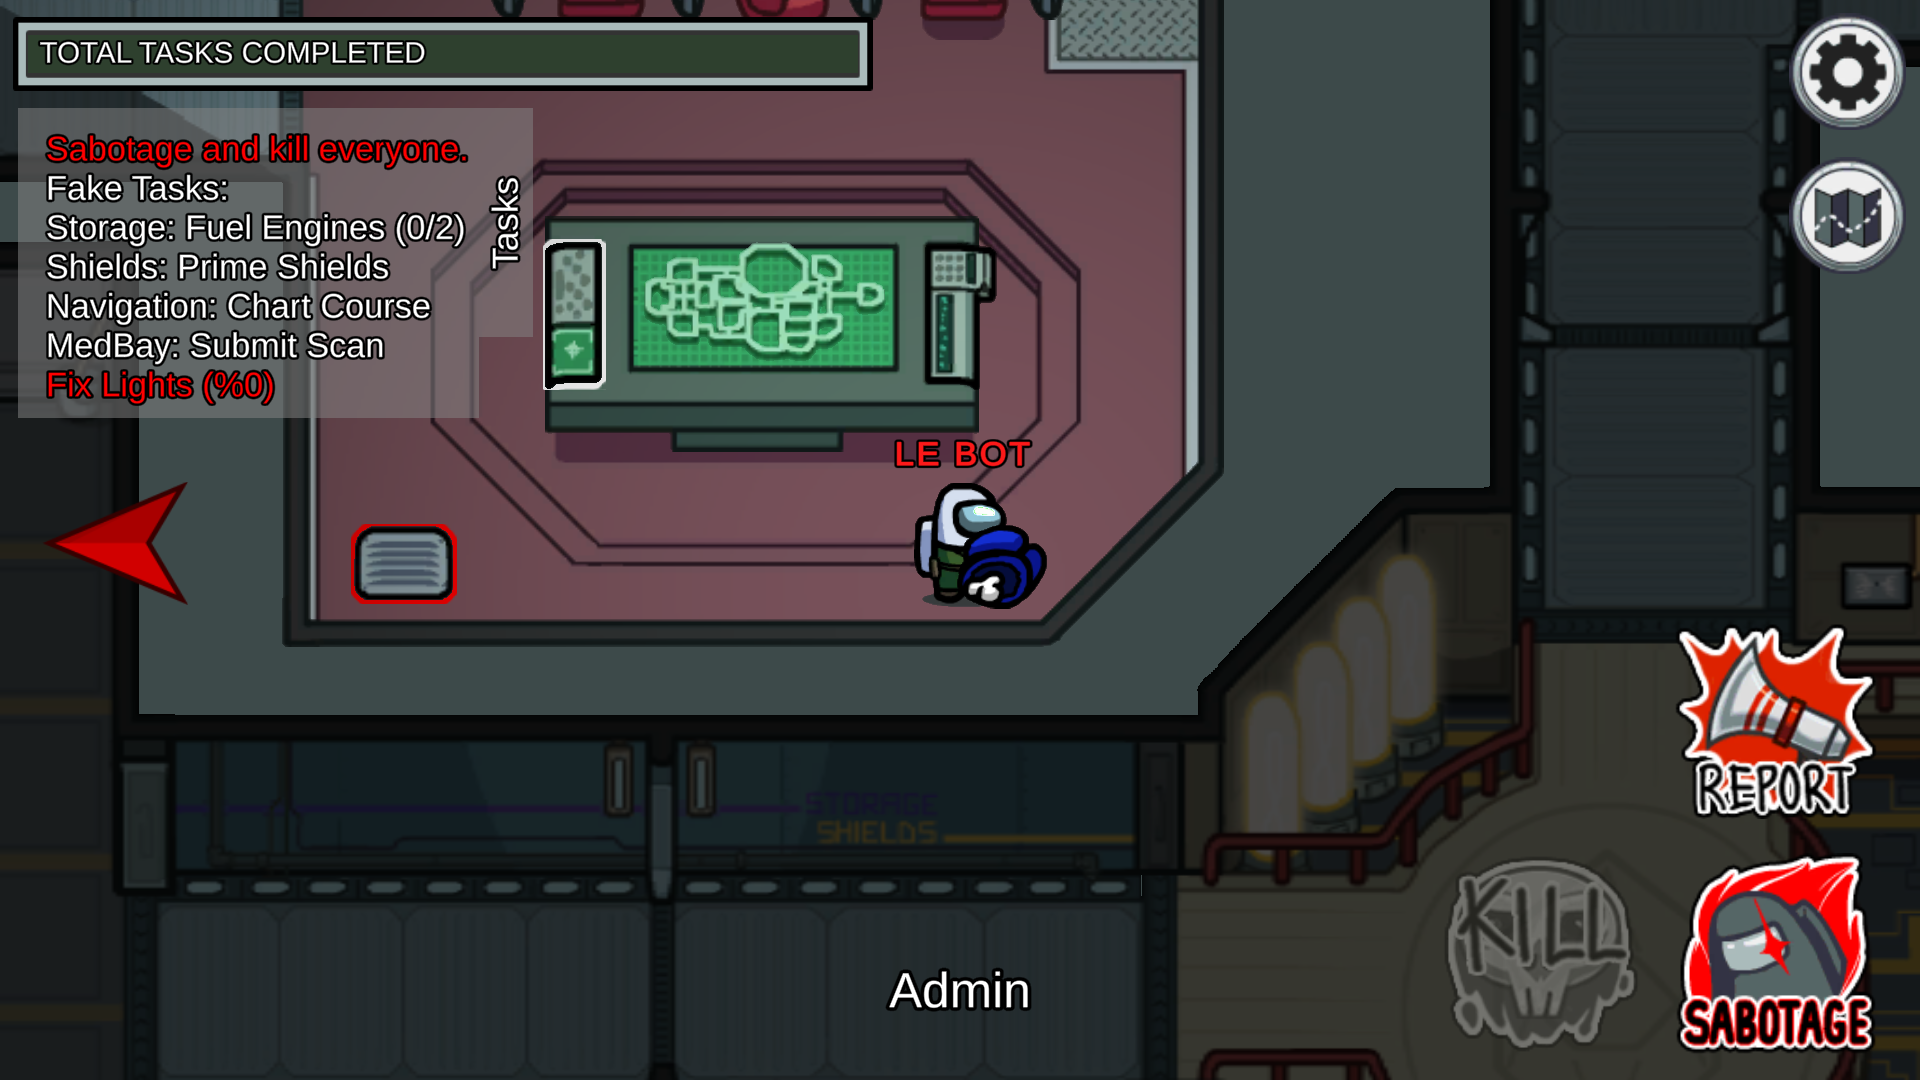

In [6]:
b.vision_manager.vision_screen

In [5]:
b.vision_manager.vision_thread.is_alive()

False

In [4]:
b.vision_manager.stop_vision_loop()

Terminate : <KillableThread(compute_screen, stopped 2836)>


### Check Button 


In [9]:
print("impostor :", b.vision_manager.is_impostor())
print(b.vision_manager.get_game_phase())
print("use :", b.vision_manager.is_btn_use_active())
print("report :", b.vision_manager.is_btn_report_active())
print("kill :", b.vision_manager.is_btn_kill_active())
print("vent :", b.vision_manager.is_btn_vent_active())
print("sabotage :", b.vision_manager.is_btn_sabotage_active())
print("admin :", b.vision_manager.is_btn_admin_active())
print("security :", b.vision_manager.is_btn_security_active())

impostor : True
GamePhase.Game
use : False
report : False
kill : False
vent : False
sabotage : False
admin : False
security : False


### Get the nearest Task

In [4]:
b.get_tasks()

[5: Clear Asteroids,
 6: Divert Power,
 19: Fix Wires (Storage),
 36: Download/Upload (Communications)]

In [13]:
b.get_tasks()[2].location

(978, 696)

In [11]:
tasks = b.get_tasks()
for task in tasks:
    print(len(b.game_map.navigation_manager.calculate_path(b.position.find_me(), task.location)))

0
0
36
0


In [14]:
b.get_nearest_task()
b.next_task

Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾


5: Clear Asteroids

In [15]:
b.position.find_me()

(1017, 592)

## Navigate

In [19]:
security_location = (520, 480)
b.go_to_destination(security_location)

Didn't find me ! 🙈


In [23]:
accept_power_task = b.game_map.task_manager.tasks[12]
accept_power_security_location = (550, 460)

shield_location_apeupres = b.game_map.task_manager.tasks[28].location

##### Demo #####
b.go_to_destination(accept_power_security_location)
# la ligne suivante c'est au cas où
b.go_to_destination(accept_power_security_location)

b.perform_task(accept_power_task)

b.go_to_destination(shield_location_apeupres)
# la ligne suivante c'est au cas où
b.go_to_destination(shield_location_apeupres)

Didn't find me ! 🙈


### Check for tasks not reachable

In [12]:
len_paths = [len(b.get_moving_actions_to_destination(task.location)) for task in b.game_map.task_manager.tasks]
for i in range(len(len_paths)):
    if len_paths[i] == 0:
        print(f"- **{b.game_map.task_manager.tasks[i]}**")
    else:
        print(f"- OK : {b.game_map.task_manager.tasks[i]}")

Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find me ! 🙈
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
D

Not found tasks :
- 0: Align Engine (Upper Engine)
- 1: Align Engine (Lower Engine)
- 2: Calibrate Distributor
- 3: Chart Course
- 5: Clear Asteroids
- 6: Divert Power
- 11: Accept Power (O2)
- 12: Accept Power (Security)
- 13: Accept Power (Shields)
- 14: Accept Power (Weapons)
- 15: Empty Garbage/Chute (Cafeteria)
- 17: Empty Garbage/Chute (Storage)
- 21: Fix Wires (Navigation)
- 22: Fix Wires (Admin)
- 27: Inspect Sample
- 29: Stabilize Steering
- 31: Submit Scan
- 34: Download/Upload (Cafeteria)
- 35: Download/Upload (Admin)
- 36: Download/Upload (Communications)
- 37: Download/Upload (Electrical)

### NAVIGAAAAAATE 🐾🐾🐾

In [4]:
b.position.find_me()
b.position.get_tuple_coordinates()

(346, 869)

### Navigate and do these tasks

In [ ]:
tasks_indexes = [4, 7, 8, 9, 10, 16, 18, 19, 20, 23, 24, 25, 26, 28, 30, 32, 33, 38, 39]
tasks = [b.game_map.task_manager.tasks[i] for i in tasks_indexes]
for task in tasks:
    print(f"Go to {task.name}")
    b.go_to_destination(task.location)
    print(f"Perform {task.name}")
    b.perform_task(task)

Go to Clean O2 Filter
Perform Clean O2 Filter
Go to Accept Power (Communications)
Didn't find me ! 🙈
Didn't find me ! 🙈
Perform Accept Power (Communications)
Go to Accept Power (Lower Engine)
Didn't find me ! 🙈
Perform Accept Power (Lower Engine)
Go to Accept Power (Upper Engine)
Didn't find me ! 🙈
Perform Accept Power (Upper Engine)
Go to Accept Power (Navigation)
Didn't find me ! 🙈
Perform Accept Power (Navigation)
Go to Empty Garbage/Chute (O2)
Didn't find me ! 🙈
Perform Empty Garbage/Chute (O2)
Go to Fix Wires (Electrical)
Perform Fix Wires (Electrical)
Go to Fix Wires (Storage)
Didn't find me ! 🙈
Perform Fix Wires (Storage)
Go to Fix Wires (Security)
Didn't find me ! 🙈
Didn't find a path between source and target ! 🐾
Perform Fix Wires (Security)
Go to Fix Wires (Cafeteria)
Didn't find me ! 🙈
Didn't find a path between source and target ! 🐾
Perform Fix Wires (Cafeteria)
Go to Fuel Engine (Storage)
Perform Fuel Engine (Storage)
Go to Fuel Engine (Lower Engine)
Perform Fuel Engine (L

In [5]:
# result_file_path="src/img/result_path.txt"
# grid_str = navManager.path_to_grid(path, must_print=False, result_file_path=None)

## Talk during walking (experiments)

In [10]:
import threading
import multiprocessing
import logging
logging.basicConfig(level=logging.DEBUG,format='[%(levelname)s] (%(threadName)s) %(message)s')

def navigate(destination):
    print('Starting navigation')
    b.go_to_destination(destination)
    print('Exiting navigation')
def talk():
    print('Starting talking')
    time.sleep(3)
    print("I'm talking")
    time.sleep(1)
    print("Finished to talk")
    print('Exiting talking')

t = multiprocessing.Process(name='Nav', target=navigate, args=((520,480),))
u = multiprocessing.Process(name='Talk', target=talk)
t.start()
t.join()
u.start()
u.join()

In [3]:
import multiprocessing

print(b.position.find_me())
manager = multiprocessing.Manager()
return_dict = manager.dict()
jobs = []
for i in range(5):
    p = multiprocessing.Process(target=b.position.find_me, args=(return_dict))
    jobs.append(p)
    p.start()

for proc in jobs:
    proc.join()
print(return_dict.values())
    
# p=Pool(processes = num_processors)
# output = p.map(b.position.find_me, [])
# print(output)
# p=Process(name="Find", target=b.position.find_me)
# output = p.start()
# print(output)
# output=p.join()
# print(output)

(1732, 503)
[]


In [3]:
from multiprocessing import Process, Queue

class Multiprocessor():

    def __init__(self):
        self.processes = []
        self.queue = Queue()

    @staticmethod
    def _wrapper(func, queue, args, kwargs):
        ret = func(*args, **kwargs)
        queue.put(ret)

    def run(self, func, *args, **kwargs):
        args2 = [func, self.queue, args, kwargs]
        p = Process(target=self._wrapper, args=args2)
        self.processes.append(p)
        p.start()

    def wait(self):
        rets = []
        for p in self.processes:
            ret = self.queue.get()
            rets.append(ret)
        for p in self.processes:
            p.join()
        return rets

In [ ]:
# tester
if __name__ == "__main__":
    mp = Multiprocessor()
    num_proc = 3
    for _ in range(num_proc): # queue up multiple tasks running `sum`
        mp.run(b.position.find_me)
    ret = mp.wait() # get all results
    print(ret)
    assert len(ret) == num_proc and all(r == 15 for r in ret)

In [7]:
action = MovingAction("left", 200)
b.position.find_me()
action_thread = threading.Thread(name="action", target=b.position.move, args=(action.distance, action.direction,))
action_thread.start()
action_thread.join()

## Solve a task

In [27]:
b.game_map.task_manager.prompt_task()

What task would you like to perform?:
0: Troubleshoot
1: Swipe_Card
2: Download_Upload
3: Fuel_Engines
4: Divert_Power
5: Empty_Chute
6: Accept_Power
7: Fix_Wires
8: Prime_Shields
9: Inspect_Sample
10: Stabilize_Steering
11: Submit_Scan
12: Align_Engine_Output
13: Clear_Asteroids
14: Clean_O2_Filter
15: Calibrate_Distributor
16: Start_Reactor
17: Chart_Course
18: Unlock_Manifold


options: 13


## Complete menu

In [5]:
b.menu()

### Troubleshoot

In [2]:
b.game_map.task_manager.solve_task(TaskType.Troubleshoot)
# red 377,150
# white 354,225
# red/yellow 325,386
# black 326,347
# im = pyautogui.screenshot()
# pixel = (354,225)
# im.getpixel(pixel)

Point(x=1203, y=497)
Point(x=1013, y=576)
Point(x=836, y=392)
Point(x=380, y=195)
Point(x=373, y=154)
Point(x=377, y=150)
Point(x=377, y=150)
Point(x=377, y=150)
Point(x=377, y=150)
Point(x=377, y=150)
Point(x=377, y=150)
Point(x=355, y=217)
Point(x=354, y=225)
Point(x=354, y=225)
Point(x=354, y=225)
Point(x=354, y=225)
Point(x=354, y=225)
Point(x=354, y=272)
Point(x=327, y=383)
Point(x=325, y=386)
Point(x=325, y=386)
Point(x=325, y=386)
Point(x=325, y=386)
Point(x=325, y=386)
Point(x=325, y=386)
Point(x=326, y=345)
Point(x=326, y=347)
Point(x=326, y=347)
Point(x=326, y=347)
Point(x=326, y=347)
Point(x=329, y=347)
Point(x=841, y=365)


KeyboardInterrupt: 

In [3]:
b.game_map.task_manager.solve_task(TaskType.Troubleshoot)

Point(x=571, y=936)
Point(x=571, y=936)
Point(x=571, y=936)
Point(x=571, y=936)
Point(x=-416, y=1030)
Point(x=-1192, y=816)
Point(x=-1510, y=233)
vote


KeyboardInterrupt: 

## Notes

- **0: Align Engine (Upper Engine)**
- **1: Align Engine (Lower Engine)**
- **2: Calibrate Distributor**
- **3: Chart Course**
- **4: Clean O2 Filter**
- **5: Clear Asteroids**
- **6: Divert Power**
- **7: Accept Power (Communications)**
- **8: Accept Power (Lower Engine)**
- **9: Accept Power (Upper Engine)**
- **10: Accept Power (Navigation)**
- **11: Accept Power (O2)**
- **12: Accept Power (Security)**
- **13: Accept Power (Shields)**
- **14: Accept Power (Weapons)**
- **15: Empty Garbage/Chute (Cafeteria)**
- **16: Empty Garbage/Chute (O2)**
- **17: Empty Garbage/Chute (Storage)**
- **18: Fix Wires (Electrical)**
- **19: Fix Wires (Storage)**
- **20: Fix Wires (Security)**
- **21: Fix Wires (Navigation)**
- **22: Fix Wires (Admin)**
- **23: Fix Wires (Cafeteria)**
- **24: Fuel Engine (Storage)**
- **25: Fuel Engine (Lower Engine)**
- **26: Fuel Engine (Upper Engine)**
- **27: Inspect Sample**
- 28: Prime Shields
- **29: Stabilize Steering**
- **30: Start Reactor**
- **31: Submit Scan**
- **32: Swipe Card**
- **33: Unlock Manifolds**
- **34: Download/Upload (Cafeteria)**
- **35: Download/Upload (Admin)**
- **36: Download/Upload (Communications)**
- **37: Download/Upload (Electrical)**
- **38: Download/Upload (Navigation)**
- **39: Download/Upload (Weapons)**